# Lotka-Volterra Modelling in Python

## Project Aim

The coupled ODEs for the Lotka-Volterra system cannot, *in general*, be solved analytically. This lends itself to the implementation of an ODE solver, for which we will use Runge-Kutta 4. The goal is to have a user input values for the parameters above, and the program display time series graphs (prey and predator population against time) as well as a phase plane plot for dynamics.

## Introduction

The Lotka-Volterra equations are a pair of coupled nonlinear differential equations:

\begin{equation}
    \begin{cases}
    \frac{\mathrm{d}x}{\mathrm{d}t}=\alpha x- \beta xy \\
    \frac{\mathrm{d}y}{\mathrm{d}t} = \delta xy - \gamma y
    \end{cases},
\end{equation}

where $x$ and $y$ are the prey and predator populations respectively, $t$ time. The parameter descriptions (all **real** and **positive**) are as follows: 
| Parameter | Description                     | 
|-----------|---------------------------------|
| $\alpha$  | The maximum prey per capita growth rate |
| $\beta$   |  Predation effect on prey death rate |
| $\gamma$  | Predator per capita death rate      |
| $\delta$  | Prey effect on predator growth rate |

Together these describe the dynamics of a closed system of predator and prey (with rudimentary assumptions such as no spatial constraints). To solve these equations numerically, we will use the **Runge-Kutta method of order 4**. The typical formula can be found [here](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods), but we need to slightly adapt the method since we have two equations. This can be done by treating them as completely separate differential equations:

#### Runge-Kutta 4th Order Method for Coupled DEs

Given the system $\frac{dx}{dt} = f(x, y),\frac{dy}{dt} = g(x, y)$ with initial values $(x_0, y_0)$ at $t=0$ and step size $h$, we have:


\begin{aligned}
k_{1x} &= h \cdot f(x_n, y_n), &\quad k_{1y} &= h \cdot g(x_n, y_n) \\
k_{2x} &= h \cdot f\left(x_n + \frac{1}{2}k_{1x}, y_n + \frac{1}{2}k_{1y}\right), &\quad k_{2y} &= h \cdot g\left(x_n + \frac{1}{2}k_{1x}, y_n + \frac{1}{2}k_{1y}\right) \\
k_{3x} &= h \cdot f\left(x_n + \frac{1}{2}k_{2x}, y_n + \frac{1}{2}k_{2y}\right), &\quad k_{3y} &= h \cdot g\left(x_n + \frac{1}{2}k_{2x}, y_n + \frac{1}{2}k_{2y}\right) \\
k_{4x} &= h \cdot f(x_n + k_{3x}, y_n + k_{3y}), &\quad k_{4y} &= h \cdot g(x_n + k_{3x}, y_n + k_{3y})
\end{aligned}

With 'update':
$$
x_{n+1} = x_n + \frac{1}{6}(k_{1x} + 2k_{2x} + 2k_{3x} + k_{4x}), \quad
y_{n+1} = y_n + \frac{1}{6}(k_{1y} + 2k_{2y} + 2k_{3y} + k_{4y})
$$

    



## Code

In [7]:
import numpy as np
import matplotlib.pyplot as plt

##### Runge-Kutta 4 Implementation

In [5]:
def lotka_volterra_solver(params, init_cond, N, h):
    x, y = [init_cond[0]], [init_cond[1]]
    alpha, beta, delta, gamma = params
    for n in range(N):
        k1x, k1y = h*(alpha*x[n] - beta*x[n]*y[n]), h*(delta*x[n]*y[n] - gamma*y[n])
        k2x, k2y = h*(alpha*(x[n]+0.5*k1x) - beta*(x[n]+0.5*k1x)*(y[n]+0.5*k1y)), h*(delta*(x[n]+0.5*k1x)*(y[n]+0.5*k1y) - gamma*(y[n]+0.5*k1y))
        k3x, k3y = h*(alpha*(x[n]+0.5*k2x) - beta*(x[n]+0.5*k2x)*(y[n]+0.5*k2y)), h*(delta*(x[n]+0.5*k2x)*(y[n]+0.5*k2y) - gamma*(y[n]+0.5*k2y))
        k4x, k4y = h*(alpha*(x[n]+k3x) - beta*(x[n]+k3x)*(y[n]+k3y)), h*(delta*(x[n]+k3x)*(y[n]+k3y) - gamma*(y[n]+k3y))

        x_step, y_step = x[n] + (1/6)*(k1x + 2*k2x + 2*k3x + k4x), y[n] + (1/6)*(k1y + 2*k2y + 2*k3y + k4y)
        
        x.append(x_step)
        y.append(y_step)

    return x,y

##### Time-Series Plot

In [52]:
def time_series_plot(params, init_cond, N, h):
    x_vals, y_vals = lotka_volterra_solver(params, init_cond, N, h)
    T = N*h
    t_vals = np.linspace(0,T,N+1)
    plt.plot(t_vals, x_vals, label = "Prey ($x$)", color = "green")
    plt.plot(t_vals, y_vals, label = "Predator ($y$)", color = "red")
    plt.legend(['Prey', 'Predator'])
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Lotka-Volterra Time Series')

##### Phase Plane

In [55]:
def phase_plane_plot(params, init_cond, N, h):
    x_vals, y_vals = lotka_volterra_solver(params, init_cond, N, h)
    T = N*h
    t_vals = np.linspace(0,T,N+1)
    plt.plot(x_vals,  y_vals, '-')
    plt.xlabel('Population of Predator')
    plt.ylabel('Population of Prey')
    plt.title('Lotka-Volterra Phase Plane')

## Demonstration

Once you've run the cells above, click `Ctrl+Enter` on the cell below which will begin the prompts. 
* Each user input should be separated by a space (Python will convert the numbers to a list)
* Be careful for when to use integers or decimals
* Suggestion: start with $\alpha = 1, \beta = 0.2, \delta = 0.5, \gamma = 0.2, \text{no. of days} = 40, h= 0.01$
* Remember that all the parameters should be positive!

Enter values for alpha, beta, gamma and delta (each separated by a space) 1.1 0.4 0.1 0.4
Enter the number of prey and predators respectively at time t = 0 (must be integers!): 10 10
Enter the number of days you wish to simulate for: 100
Enter the step-size for the solver (suggested: h = 0.01): 0.001


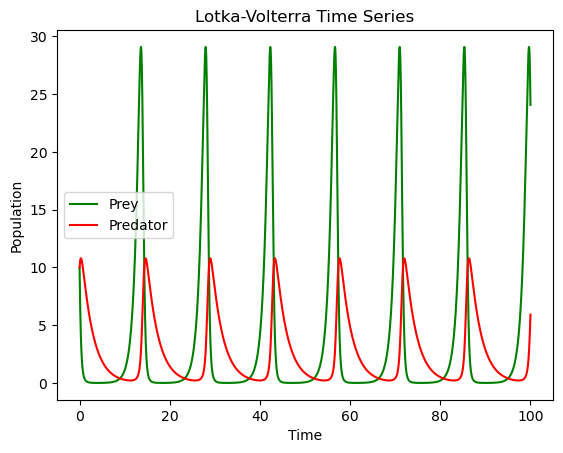

In [69]:
user_params = input("Enter values for alpha, beta, delta and gamma (each separated by a space)")
params = list(map(float, user_params.split()))
user_init_cond = input("Enter the number of prey and predators respectively at time t = 0 (must be integers!):")
init_cond = list(map(int, user_init_cond.split()))
time = int(input("Enter the number of days you wish to simulate for:"))
step = float(input("Enter the step-size for the solver (suggested: h = 0.01):"))

time_series_plot(params,init_cond, int(time/step), step)

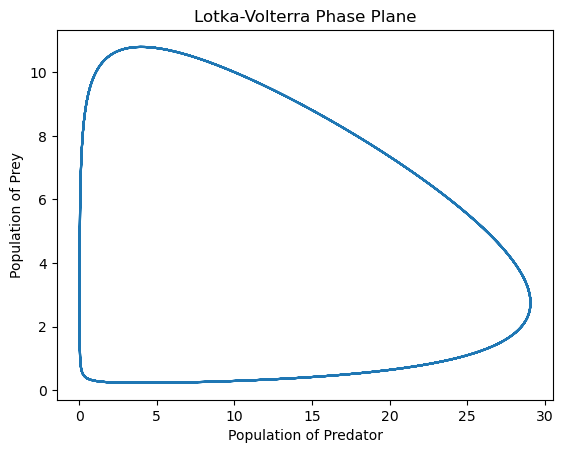

In [70]:
phase_plane_plot(params,init_cond, int(time/step), step)

### Phase Plane cont.

If we take multiple initial conditions (meaning Python recieves a list of lists as input) we can better see the dynamics of our phase plane as it will have multiple trajectories. For example, if you're following the suggested parameters from before, you could add the initial conditions $(x_0,y_0)=(1,3), (1,4), (1,5),...$. Try this below by editing the code.

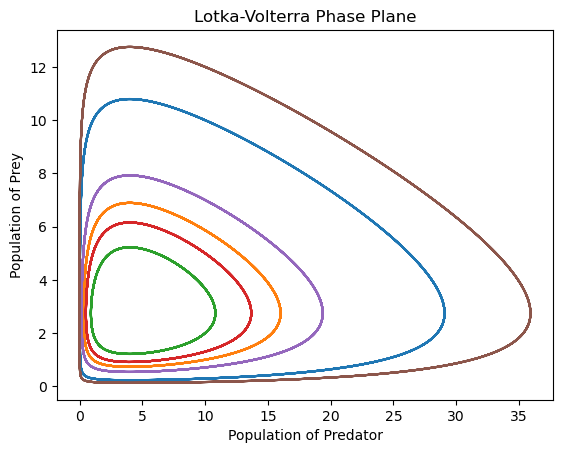

In [71]:
initial_conditions = [[10,10],[10,1],[10,2],[10,5],[10,7],[10,12],[10,15]]

for i in range(len(initial_conditions)-1):
    phase_plane_plot(params,initial_conditions[i], int(time/step), step)

If you're following the example, you'll see an example of a **limit cycle**!